In [1]:
# Importing Packages:

# EDA:
import pandas as pd # For Feature Manipulation

import numpy as np # For Maths

import seaborn as sns
import matplotlib.pyplot as plt # For Visualization

# For Preprocessing:
from sklearn.model_selection import train_test_split # For Splitting the Data

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, KBinsDiscretizer # For Scaling the Data

from sklearn.preprocessing import PowerTransformer,FunctionTransformer # For Normalization

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder # For Encoding the Data

from sklearn.experimental import enable_iterative_imputer 

from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer # For Imputing the missing values

from sklearn.compose import ColumnTransformer # Column Transformer

from sklearn.model_selection import learning_curve

from sklearn.pipeline import Pipeline # Pipeline

from sklearn.datasets import make_regression

# Model and Evaluation:
from sklearn.linear_model import LogisticRegression, LinearRegression # As we have classes in data, we'll choose Model from regression family

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score # Accuracy check

from joblib import dump # For saving the model

In [2]:
df = pd.read_csv('AI_Developer_Performance_Extended_1000.csv')
print(df.shape, df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours_Coding         1000 non-null   int64  
 1   Lines_of_Code        1000 non-null   int64  
 2   Bugs_Found           1000 non-null   int64  
 3   Bugs_Fixed           1000 non-null   int64  
 4   AI_Usage_Hours       1000 non-null   int64  
 5   Sleep_Hours          1000 non-null   float64
 6   Cognitive_Load       1000 non-null   int64  
 7   Task_Success_Rate    1000 non-null   int64  
 8   Coffee_Intake        1000 non-null   int64  
 9   Stress_Level         1000 non-null   int64  
 10  Task_Duration_Hours  1000 non-null   float64
 11  Commits              1000 non-null   int64  
 12  Errors               1000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 101.7 KB
(1000, 13) None


,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
0,7,416,9,7,6,5.9,92,34,7,99,10.5,20,3
1,4,269,16,13,5,5.1,85,36,2,100,9.5,17,8
2,11,439,3,0,2,6.2,38,79,2,55,18.3,35,2
3,8,472,15,9,4,4.2,26,94,5,30,12.6,28,4
4,5,265,19,16,5,8.1,82,33,6,82,7.0,25,9


In [3]:
df.describe()

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.84000,356.23400,9.876000,7.153000,2.961000,6.465800,56.933000,56.578000,3.368000,66.410000,8.700100,17.253000,4.544000
std,3.15854,188.15535,5.796052,5.468226,2.021278,1.439529,21.767506,20.814879,2.342234,21.865452,5.992891,10.836901,2.820997
min,1.00000,26.00000,0.000000,0.000000,0.000000,4.000000,20.000000,30.000000,0.000000,30.000000,0.500000,1.000000,0.000000
25%,3.00000,209.50000,5.000000,2.000000,1.000000,5.200000,38.000000,37.000000,1.000000,48.000000,4.000000,9.000000,2.000000
50%,6.00000,332.00000,10.000000,7.000000,3.000000,6.400000,57.000000,55.500000,3.000000,66.000000,7.450000,14.000000,5.000000
75%,9.00000,480.50000,15.000000,12.000000,5.000000,7.700000,76.000000,74.000000,5.000000,86.000000,12.000000,23.000000,7.000000
max,11.00000,993.00000,19.000000,19.000000,6.000000,9.000000,94.000000,100.000000,7.000000,100.000000,27.500000,50.000000,9.000000


In [4]:
df.isnull().sum()

Hours_Coding           0
Lines_of_Code          0
Bugs_Found             0
Bugs_Fixed             0
AI_Usage_Hours         0
Sleep_Hours            0
Cognitive_Load         0
Task_Success_Rate      0
Coffee_Intake          0
Stress_Level           0
Task_Duration_Hours    0
Commits                0
Errors                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

<Axes: >

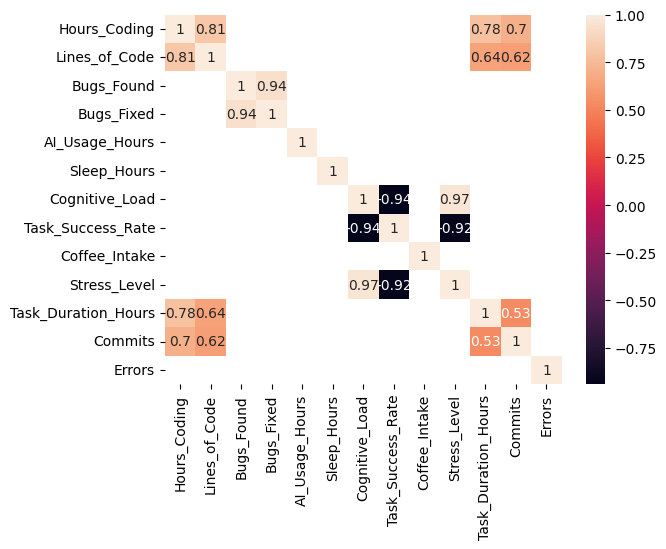

In [6]:
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr[(corr<-0.3)|(corr>0.3)], annot=True)

- Task success rate is highly negatively correlated with stress level and cognitive load.

**This Dataset can be more accurately used to predict task success rate than other features.**

### **What is the optimal balance between Hours_Coding and Sleep_Hours that maximizes Task_Success_Rate while minimizing Errors?**

In [7]:
df.groupby(['Sleep_Hours', 'Hours_Coding'])['Errors'].count().sort_values(ascending=False)

Sleep_Hours  Hours_Coding
6.1          5               8
8.8          9               7
4.2          2               7
4.3          11              6
6.0          9               6
                            ..
8.9          11              1
             4               1
             2               1
             1               1
4.0          3               1
Name: Errors, Length: 449, dtype: int64

- `Sleep Hours: 6 & Coding Hours: 5` is best to give most success rate 

### **How do Hours_Coding and Lines_of_Code impact Task_Success_Rate?**

In [8]:
df['Label_Hours_Coding'] = pd.cut(df['Hours_Coding'], bins=[0, 5, 8, 11], 
                                  labels=['Under 5 hours', '5 to 8 hours', '8 to 11 hours'])

df['Label_Lines_of_Code'] = pd.cut(df['Lines_of_Code'],
                                   bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                                   labels=['under 100', 'under 200', 'under 300', 'under 400', 
                                           'under 500', 'under 600', 'under 700', 'under 800',
                                           'under 900', 'under 1000'])

df['Label_Task_Success_Rate'] = pd.cut(df['Task_Success_Rate'], 
                                       bins=[0, 40, 60, 80, 100],
                                       labels=['under 40', '40-60', '60-80', '80-100'])

<Axes: xlabel='Label_Hours_Coding', ylabel='Label_Lines_of_Code'>

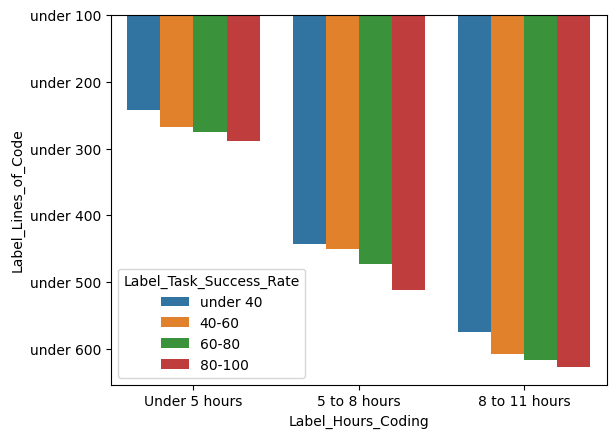

In [9]:
sns.barplot(data=df, x='Label_Hours_Coding', y='Label_Lines_of_Code', hue='Label_Task_Success_Rate', errorbar=None)

- `Task Sucess is 80-100` when lines of code are most in any slot.

### **How does Cognitive_Load affect Task_Success_Rate and Errors?**

In [10]:
df['Label_Cognitive_Load'] = pd.cut(df['Cognitive_Load'], 
                                       bins=[0, 40, 60, 80, 100],
                                       labels=['under 40', '40-60', '60-80', '80-100'])

<Axes: xlabel='Label_Cognitive_Load', ylabel='Errors'>

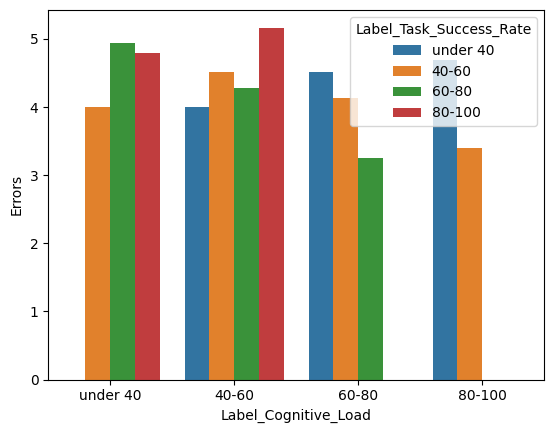

In [11]:
sns.barplot(data=df, x='Label_Cognitive_Load', y='Errors', hue='Label_Task_Success_Rate', errorbar=None)

- Task success rate is 80-100 when cognitive load is under 60
- Task success rate is 60-80 when cognitive load is under 40

### **Is there a relationship between Sleep_Hours and number of Errors or Task_Success_Rate?**

In [12]:
df['Label_Sleep_Hours'] = pd.cut(df['Sleep_Hours'], 
                                       bins=[0, 5, 6, 8, 10],
                                       labels=[5, 6, 8, 10])

<Axes: xlabel='Label_Sleep_Hours', ylabel='Errors'>

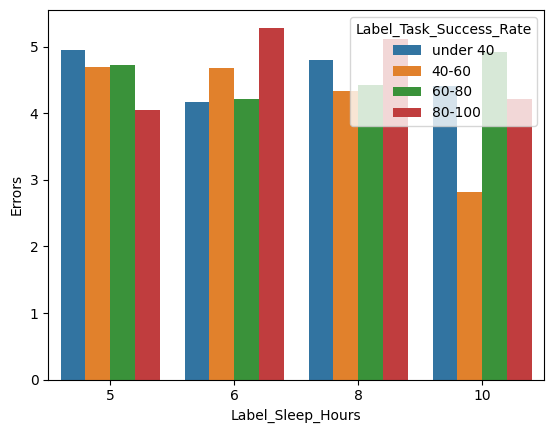

In [13]:
sns.barplot(data=df, x='Label_Sleep_Hours', y='Errors', hue='Label_Task_Success_Rate', errorbar=None)

- Minimum errors in maximum success rate is in `6-8 Hours Sleep` slot

In [14]:
x= df[['Lines_of_Code', 'AI_Usage_Hours', 'Cognitive_Load', 'Task_Duration_Hours','Errors']]
y=df['Label_Task_Success_Rate']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

In [15]:
pipe = Pipeline(steps=[
                ("preprocessor", ColumnTransformer(transformers=[
                ("num", StandardScaler(), x.select_dtypes(include='number').columns.tolist()),
                ("cat", OneHotEncoder(), x.select_dtypes(include=['object', 'category']).columns.tolist())],
                remainder="drop")),
                ("model", LogisticRegression(class_weight='balanced', max_iter=500))]) 

pipe.fit(xtrain, ytrain)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [16]:
ypred = pipe.predict(xtest)
print(f'We got good accuracy: {accuracy_score(ytest, ypred)*100:.2f}%')

We got good accuracy: 84.00%


In [17]:
prediction_proba = pipe.predict_proba(x)[0][1]
print(f'Probability of positive class: {prediction_proba*100:.2f}%')

Probability of positive class: 0.01%


In [18]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

       40-60       0.82      0.75      0.78        55
       60-80       0.76      0.82      0.79        50
      80-100       0.86      0.83      0.85        30
    under 40       0.91      0.94      0.92        65

    accuracy                           0.84       200
   macro avg       0.84      0.83      0.84       200
weighted avg       0.84      0.84      0.84       200



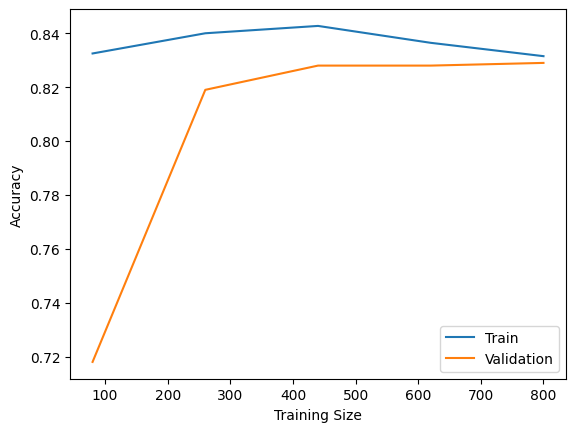

In [19]:
train_sizes, train_scores, val_scores = learning_curve(
    pipe, x, y, cv=5, scoring='accuracy')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [20]:
dump(pipe, 'AI_Developer_Performance.joblib')
print('Model Saved Successfully')

Model Saved Successfully
